In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Bilal Shoaib\PythonProjects\Machine Learning FYP\datasets\kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.shape

(400, 26)

In [4]:
# Columns to keep

data_cols = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

In [5]:
# Droppping other columns

data.drop([col for col in data.columns if not col in data_cols], axis=1, inplace=True)

In [6]:
# Dropping the rows that are null

data.dropna(axis=0, inplace=True)

In [7]:
# Transforming non numerical cols
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

for col in data.columns:
    if data[col].dtype == np.number:
        continue
    data[col] = LabelEncoder().fit_transform(data[col])

<ipython-input-7-0b05e5f4a85f>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[col].dtype == np.number:


In [8]:
data.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [9]:
# Splitting data
from sklearn.model_selection import train_test_split

x = data.drop('classification', axis=1)
y = data['classification']

In [10]:
x_scaler = MinMaxScaler()
x_scaler.fit(x)
col_names = x.columns
x[col_names] = x_scaler.transform(x)

In [11]:
x.head()

,sg,al,sc,hemo,pcv,htn
0,0.75,0.2,0.033898,0.836735,0.717949,1.0
1,0.75,0.8,0.016949,0.557823,0.564103,0.0
2,0.25,0.4,0.059322,0.442177,0.384615,0.0
3,0.00,0.8,0.144068,0.551020,0.410256,1.0
4,0.25,0.4,0.042373,0.578231,0.487179,0.0


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

def model_evaluation(y_test, y_pred):
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))    
    print('Precision Score:', precision_score(y_test, y_pred))    
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('f1_score:', f1_score(y_test, y_pred))    

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

In [15]:
model_evaluation(y_test, lr_pred)

Accuracy Score: 0.9655172413793104
Recall Score: 1.0
Precision Score: 0.9230769230769231
Confusion Matrix:
 [[32  2]
 [ 0 24]]
f1_score: 0.9600000000000001


In [16]:
from keras.models import Sequential, load_model
from keras.layers import Dense
import keras as k

In [18]:
# ANN MODEL

model = Sequential()
model.add(Dense(256, input_dim=len(x.columns), kernel_initializer = k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation='hard_sigmoid'))

#256 neurons, input_dim = no of input features(layers), k_init generates tensors within normal dist

In [19]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Train the model
history = model.fit(x_train, y_train, epochs=2000, batch_size=x_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 0.6936 - accuracy: 0.4716
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6863 - accuracy: 0.4978
Epoch 3/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6791 - accuracy: 0.6376
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6720 - accuracy: 0.7336
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6649 - accuracy: 0.7904
Epoch 6/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6580 - accuracy: 0.8253
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6511 - accuracy: 0.8384
Epoch 8/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6443 - accuracy: 0.8472
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6375 - accuracy: 0.8559
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.8603
Epoch 11/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.1608 - accuracy: 0.9214
Epoch 84/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1581 - accuracy: 0.9214
Epoch 85/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.1556 - accuracy: 0.9214
Epoch 86/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.1532 - accuracy: 0.9214
Epoch 87/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1510 - accuracy: 0.9214
Epoch 88/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1488 - accuracy: 0.9258
Epoch 89/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1467 - accuracy: 0.9301
Epoch 90/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1447 - accuracy: 0.9301
Epoch 91/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.1427 - accuracy: 0.9301
Epoch 92/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1409 - accuracy: 0.9345
Epoch 93/2000
1/1 [===

1/1 [==============================] - 0s 7ms/step - loss: 0.0796 - accuracy: 0.9607
Epoch 165/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0792 - accuracy: 0.9607
Epoch 166/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0788 - accuracy: 0.9607
Epoch 167/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0785 - accuracy: 0.9607
Epoch 168/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0781 - accuracy: 0.9607
Epoch 169/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0778 - accuracy: 0.9607
Epoch 170/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0774 - accuracy: 0.9607
Epoch 171/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0771 - accuracy: 0.9607
Epoch 172/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0768 - accuracy: 0.9607
Epoch 173/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.0764 - accuracy: 0.9607
Epoch 174/20

1/1 [==============================] - 0s 5ms/step - loss: 0.0584 - accuracy: 0.9782
Epoch 246/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0582 - accuracy: 0.9782
Epoch 247/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0580 - accuracy: 0.9782
Epoch 248/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0578 - accuracy: 0.9782
Epoch 249/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0576 - accuracy: 0.9782
Epoch 250/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0574 - accuracy: 0.9782
Epoch 251/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0571 - accuracy: 0.9782
Epoch 252/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9782
Epoch 253/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0567 - accuracy: 0.9782
Epoch 254/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0565 - accuracy: 0.9782
Epoch 255/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0438 - accuracy: 0.9825
Epoch 327/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0437 - accuracy: 0.9825
Epoch 328/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9825
Epoch 329/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0434 - accuracy: 0.9825
Epoch 330/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0433 - accuracy: 0.9825
Epoch 331/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0432 - accuracy: 0.9825
Epoch 332/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0430 - accuracy: 0.9825
Epoch 333/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0429 - accuracy: 0.9825
Epoch 334/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 0.9825
Epoch 335/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9825
Epoch 336/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9825
Epoch 408/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0344 - accuracy: 0.9825
Epoch 409/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 0.9825
Epoch 410/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.9825
Epoch 411/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.9825
Epoch 412/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9825
Epoch 413/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.9825
Epoch 414/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.9825
Epoch 415/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0337 - accuracy: 0.9825
Epoch 416/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.9825
Epoch 417/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.0280 - accuracy: 0.9825
Epoch 489/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0280 - accuracy: 0.9825
Epoch 490/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9825
Epoch 491/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0278 - accuracy: 0.9825
Epoch 492/2000
1/1 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.98 - 0s 7ms/step - loss: 0.0278 - accuracy: 0.9825
Epoch 493/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0277 - accuracy: 0.9825
Epoch 494/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0276 - accuracy: 0.9825
Epoch 495/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9825
Epoch 496/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0275 - accuracy: 0.9825
Epoch 497/2000
1/1 [==============================] - 0s 4ms/step - loss

1/1 [==============================] - 0s 12ms/step - loss: 0.0242 - accuracy: 0.9869
Epoch 567/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0241 - accuracy: 0.9869
Epoch 568/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9869
Epoch 569/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9869
Epoch 570/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0240 - accuracy: 0.9869
Epoch 571/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0240 - accuracy: 0.9869
Epoch 572/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0240 - accuracy: 0.9869
Epoch 573/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0239 - accuracy: 0.9869
Epoch 574/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0239 - accuracy: 0.9869
Epoch 575/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0239 - accuracy: 0.9869
Epoch 576/200

1/1 [==============================] - 0s 13ms/step - loss: 0.0220 - accuracy: 0.9869
Epoch 649/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0220 - accuracy: 0.9869
Epoch 650/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0220 - accuracy: 0.9869
Epoch 651/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0219 - accuracy: 0.9869
Epoch 652/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0219 - accuracy: 0.9869
Epoch 653/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9869
Epoch 654/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9869
Epoch 655/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0218 - accuracy: 0.9869
Epoch 656/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0218 - accuracy: 0.9869
Epoch 657/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0218 - accuracy: 0.9869
Epoch 65

1/1 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 729/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 730/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 731/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 732/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 733/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.9869
Epoch 734/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 735/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 736/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 737/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9869
Epoch 738/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.0190 - accuracy: 0.9869
Epoch 810/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190 - accuracy: 0.9869
Epoch 811/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 0.9869
Epoch 812/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0190 - accuracy: 0.9869
Epoch 813/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0190 - accuracy: 0.9869
Epoch 814/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 815/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 816/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 817/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 818/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0189 - accuracy: 0.9869
Epoch 819/200

Epoch 891/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0178 - accuracy: 0.9913
Epoch 892/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.9913
Epoch 893/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177 - accuracy: 0.9913
Epoch 894/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.9913
Epoch 895/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.9913
Epoch 896/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177 - accuracy: 0.9913
Epoch 897/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.9913
Epoch 898/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.9913
Epoch 899/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9956
Epoch 900/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.9913


1/1 [==============================] - 0s 7ms/step - loss: 0.0167 - accuracy: 0.9956
Epoch 973/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0167 - accuracy: 0.9956
Epoch 974/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.9956
Epoch 975/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.9956
Epoch 976/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0167 - accuracy: 0.9956
Epoch 977/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0167 - accuracy: 0.9956
Epoch 978/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0167 - accuracy: 0.9956
Epoch 979/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0167 - accuracy: 0.9956
Epoch 980/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.9956
Epoch 981/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.9956
Epoch 982/2000

Epoch 1053/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0160 - accuracy: 0.9956
Epoch 1054/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0160 - accuracy: 0.9956
Epoch 1055/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0159 - accuracy: 0.9956
Epoch 1056/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.0159 - accuracy: 0.9956
Epoch 1057/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0159 - accuracy: 0.9956
Epoch 1058/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159 - accuracy: 0.9956
Epoch 1059/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0159 - accuracy: 0.9956
Epoch 1060/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0159 - accuracy: 0.9956
Epoch 1061/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0159 - accuracy: 0.9956
Epoch 1062/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159 - ac

1/1 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.9956
Epoch 1134/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0152 - accuracy: 0.9956
Epoch 1135/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0152 - accuracy: 0.9956
Epoch 1136/2000
1/1 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.99 - 0s 7ms/step - loss: 0.0152 - accuracy: 0.9956
Epoch 1137/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0152 - accuracy: 0.9956
Epoch 1138/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.9956
Epoch 1139/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0151 - accuracy: 0.9956
Epoch 1140/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151 - accuracy: 0.9956
Epoch 1141/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.9956
Epoch 1142/2000
1/1 [==============================] - 0s 10ms/s

1/1 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 1213/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 1214/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 1215/2000
1/1 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.99 - 0s 8ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 1216/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 1217/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 1218/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 1219/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0143 - accuracy: 0.9956
Epoch 1220/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0144 - accuracy: 0.9956
Epoch 1221/2000
1/1 [==============================] - 0s 10ms/s

1/1 [==============================] - 0s 13ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 1293/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 1294/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 1295/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 1296/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 1297/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 1298/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 1299/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 1300/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 1301/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0136 - accuracy: 0.9956
Ep

1/1 [==============================] - 0s 6ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 1373/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 1374/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 1375/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 1376/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 1377/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 1378/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 1379/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 1380/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 1381/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.9956
Epoch 1453/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 0.9956
Epoch 1454/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.9956
Epoch 1455/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.9956
Epoch 1456/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 0.9956
Epoch 1457/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 0.9956
Epoch 1458/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 0.9956
Epoch 1459/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9956
Epoch 1460/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.9956
Epoch 1461/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1533/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1534/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1535/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1536/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1537/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0115 - accuracy: 0.9956
Epoch 1538/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0115 - accuracy: 0.9956
Epoch 1539/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.9956
Epoch 1540/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.9956
Epoch 1541/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0115 - accuracy: 0.9956
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1613/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1614/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1615/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1616/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1617/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1618/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1619/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1620/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.9956
Epoch 1621/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9956
Epoc

1/1 [==============================] - 0s 7ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 1693/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 1694/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 1695/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 1696/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 1697/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 1698/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 1699/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 1700/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 1701/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9956
Epoch 1773/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9956
Epoch 1774/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9956
Epoch 1775/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.9956
Epoch 1776/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1777/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1778/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1779/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1780/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 1781/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 0.9956
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.0095 - accuracy: 0.9956
Epoch 1854/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0095 - accuracy: 0.9956
Epoch 1855/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0095 - accuracy: 0.9956
Epoch 1856/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0095 - accuracy: 0.9956
Epoch 1857/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0095 - accuracy: 0.9956
Epoch 1858/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1859/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0095 - accuracy: 0.9956
Epoch 1860/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1861/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.9956
Epoch 1862/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 0.9956
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1933/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1934/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1935/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1936/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1937/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1938/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1939/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1940/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1941/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9956
Epoch 

Text(0.5, 0, 'epoch')

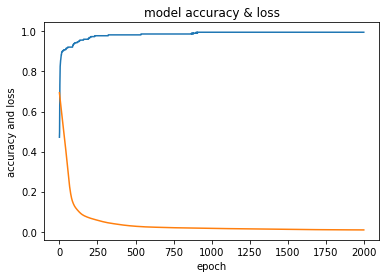

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [27]:
model.predict(x_test)

array([[0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.   

In [30]:
import joblib

joblib.dump(model, 'kidney-logRed.pkl')

TypeError: cannot pickle 'weakref' object

In [33]:
model.save('kidney.pkl')

INFO:tensorflow:Assets written to: kidney.pkl\assets
